In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Creating a Graph with edge information
###### Note that NetworkX search for a 'weight' in the edges, since many algorithm use this information (see plot difference with kamada-kawai), but we can add as many information we need on the edges

Kamada-Kawai layout use the weight attribute as a distance between nodes. This is Implicit


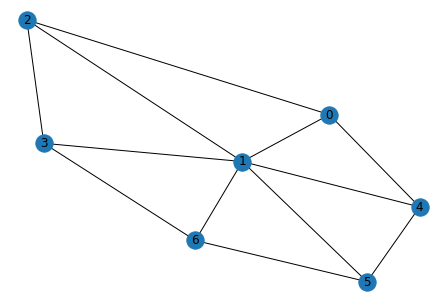

We can force kamada-kawai consider all distance as a fixed value


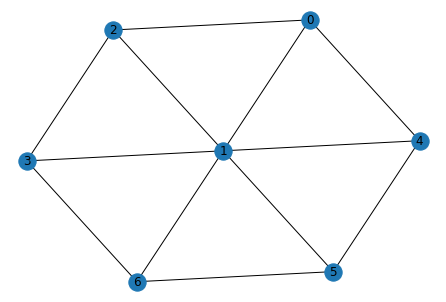

In [26]:
G= nx.Graph()
G.add_edges_from([
    (0,1,{'weight':0.75}),
    (0,2,{'weight':3}),
    (0,4,{'weight':3}),
    (2,1,{'weight':2}),
    (2,3,{'weight':2}),
    (3,1,{'weight':1}),
    (3,6,{'weight':3}),
    (6,1,{'weight':1}),
    (6,5,{'weight':1,'Description':'Desc1'}),
    (5,1,{'weight':4,'Description':'Desc2'}),
    (5,4,{'weight':1,'Description':'Desc3'}),
    (4,1,{'weight':1,'Description':'Desc4'})
])
print("Kamada-Kawai layout use the weight attribute as a distance between nodes. This is Implicit")
nx.draw_kamada_kawai(G,with_labels=1)
plt.show()
print("We can force kamada-kawai consider all distance as a fixed value")
pos = nx.kamada_kawai_layout(G,weight=1)
nx.draw(G,pos=pos,with_labels=1)
plt.show()

# Plotting the 'labels'
###### 1. Use the layout you want (pos) <br> 2. Get the edges values (edge_labels) <br> 3. Plot with nx.draw_networkx_edge_labels and nx.draw

==========WEIGHT
Edges Weights: {(0, 1): 0.75, (0, 2): 3, (0, 4): 3, (1, 2): 2, (1, 3): 1, (1, 6): 1, (1, 5): 4, (1, 4): 1, (2, 3): 2, (4, 5): 1, (3, 6): 3, (6, 5): 1}


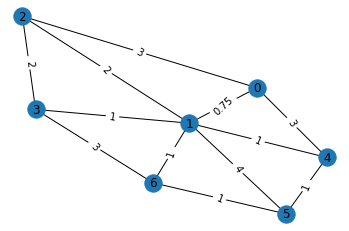



==========DESCRIPTION
Edges Description: {(1, 5): 'Desc2', (1, 4): 'Desc4', (4, 5): 'Desc3', (6, 5): 'Desc1'}


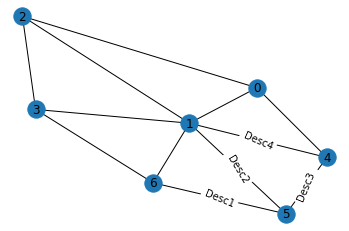

In [51]:
print("==========WEIGHT")
nodePositions = nx.kamada_kawai_layout(G)
edgesAttrs = nx.get_edge_attributes(G,'weight')
print('Edges Weights:', edgesAttrs)
nx.draw_networkx_edge_labels(G,edge_labels=edgesAttrs,pos=nodePositions)
nx.draw(G,pos=nodePositions,with_labels=1)
plt.show()

print("\n\n==========DESCRIPTION")
edgesAttrs = nx.get_edge_attributes(G,'Description')
print('Edges Description:', edgesAttrs)
nx.draw_networkx_edge_labels(G,edge_labels=edgesAttrs,pos=nodePositions)
nx.draw(G,pos=nodePositions,with_labels=1)
plt.show()

# Filtering Edges by Value
###### Here we create new graphs instead of changing the original G. 



==========Weight > 1
Edges Weight: {(0, 2): 3, (0, 4): 3, (2, 1): 2, (2, 3): 2, (1, 5): 4, (3, 6): 3}


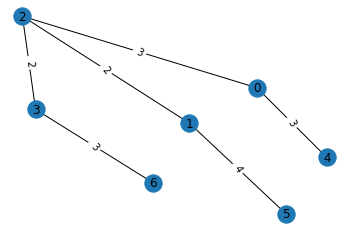



==========Only Edges with description
Edges Description: {(1, 5): 'Desc2', (1, 4): 'Desc4', (5, 4): 'Desc3', (5, 6): 'Desc1'}


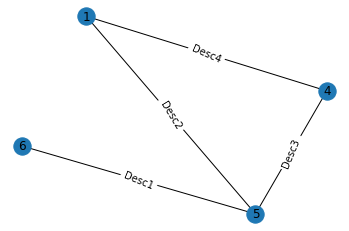

In [66]:
print("\n\n==========Weight > 1")
edgesAttrs = nx.get_edge_attributes(G,'weight')
G2 = nx.Graph()
for edge in edgesAttrs:
    w = edgesAttrs[edge]
    if(w>1):
        #Note that the method 'add_edge' its different from 'add_edges_from'. Check the two signatures in documentations
        G2.add_edge(edge[0],edge[1],weight=w)
    
edgesAttrs = nx.get_edge_attributes(G2,'weight')
print('Edges Weight:', edgesAttrs)
nx.draw_networkx_edge_labels(G2,edge_labels=edgesAttrs,pos=nodePositions)
nx.draw(G2,pos=nodePositions,with_labels=1)
plt.show()


print("\n\n==========Only Edges with description")
edgesAttrs = nx.get_edge_attributes(G,'Description')
G3 = nx.Graph()
for edge in edgesAttrs:
    w = edgesAttrs[edge]
    G3.add_edge(edge[0],edge[1],Description=w)
    
edgesAttrs = nx.get_edge_attributes(G3,'Description')
print('Edges Description:', edgesAttrs)
nx.draw_networkx_edge_labels(G3,edge_labels=edgesAttrs,pos=nodePositions)
nx.draw(G3,pos=nodePositions,with_labels=1)
plt.show()

# DiGraph

By Default NX can transform a undirectional Graph into a DiGraph


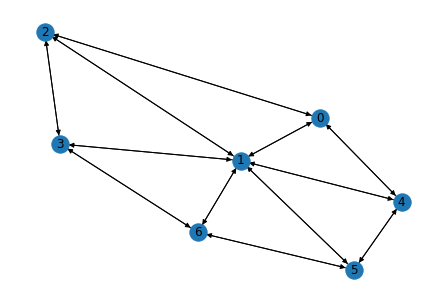

The wights are duplicate: (A->B,w=1) and (B->A,w=1)
Edges Weights: {(0, 1): 0.75, (0, 2): 3, (0, 4): 3, (1, 0): 0.75, (1, 2): 2, (1, 3): 1, (1, 6): 1, (1, 5): 4, (1, 4): 1, (2, 0): 3, (2, 1): 2, (2, 3): 2, (4, 0): 3, (4, 5): 1, (4, 1): 1, (3, 2): 2, (3, 1): 1, (3, 6): 3, (6, 3): 3, (6, 1): 1, (6, 5): 1, (5, 6): 1, (5, 1): 4, (5, 4): 1}


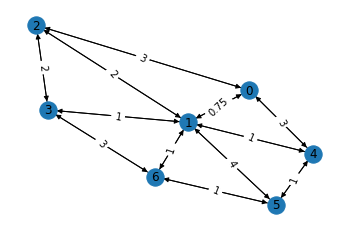

In [70]:
print("By Default NX can transform a undirectional Graph into a DiGraph")
DigG1 = nx.DiGraph(G)
nx.draw_kamada_kawai(DigG,with_labels=1)
plt.show()

print("The wights are duplicate: (A->B,w=1) and (B->A,w=1)")
nodePositions = nx.kamada_kawai_layout(DigG1)
edgesAttrs = nx.get_edge_attributes(DigG1,'weight')
print('Edges Weights:', edgesAttrs)
nx.draw_networkx_edge_labels(DigG1,edge_labels=edgesAttrs,pos=nodePositions)
nx.draw(DigG1,pos=nodePositions,with_labels=1)
plt.show()

# Parallels Edges
###### The problem comes when the A and B have two edges with different values: (A->B,w=2) and (B->A,w=4)

In [100]:
#Since this code a more complex, It's encapsulated in a function 
#Chance figsize=(7,7) to increase/decrease the plot size
#Chance 'rad = 0.05' to increase/decrease arc size
def plotDiGrapth(G,distanceBasedOnWeight=False):
    plt.figure(figsize=(7,7))
    if(distanceBasedOnWeight):
            pos = nx.kamada_kawai_layout(G)
    else:
        pos = nx.kamada_kawai_layout(G,weight='None')
        
    nx.draw(G, pos, with_labels=True, connectionstyle='arc3, rad = 0.05',node_size=500)
    
    edge_labels={}
    for v1, v2, w in G.edges(data=True):
        if pos[v1][0] > pos[v2][0]:
            pesoIda = w["weight"]
            if (v2,v1) in G.edges:
                pesoVolta = G.edges[(v2,v1)]["weight"]
                edge_labels[(v1,v2)]=f'{pesoIda}\n\n{pesoVolta}'
            else:
                edge_labels[(v1,v2)]=f'{pesoIda}\n\n'
    
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black',font_size=10)
    plt.show()

Edges Weights: {('A', 'B'): 1, ('A', 'C'): 2, ('A', 'D'): 3, ('B', 'A'): 4, ('B', 'C'): 3, ('C', 'A'): 5, ('C', 'B'): 3, ('C', 'D'): 1, ('D', 'A'): 2, ('D', 'C'): 2}


Problem:


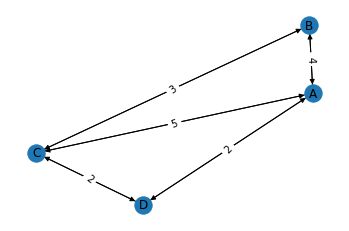

Solution 1


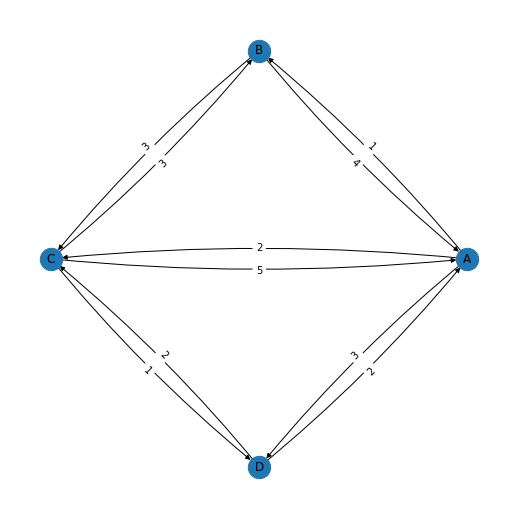

Solution 2


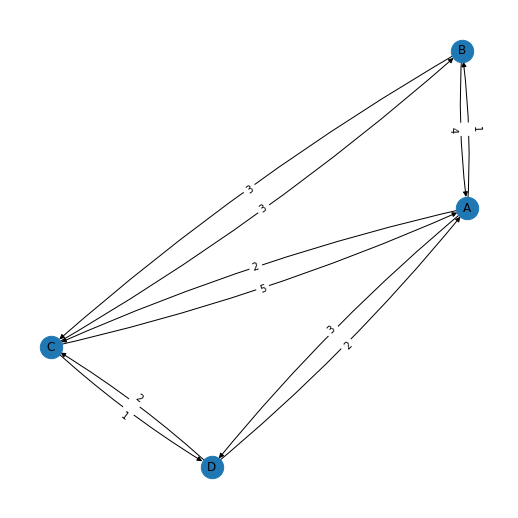

In [102]:
DigG2 = nx.DiGraph()
DigG2.add_edge('A','B',weight=1)
DigG2.add_edge('A','C',weight=2)
DigG2.add_edge('A','D',weight=3)

DigG2.add_edge('B','A',weight=4)
DigG2.add_edge('B','C',weight=3)

DigG2.add_edge('C','A',weight=5)
DigG2.add_edge('C','B',weight=3)
DigG2.add_edge('C','D',weight=1)

DigG2.add_edge('D','A',weight=2)
DigG2.add_edge('D','C',weight=2)

edgesAttrs = nx.get_edge_attributes(DigG2,'weight')
print('Edges Weights:', edgesAttrs)

print("\n\nProblem:")
nodePositions = nx.kamada_kawai_layout(DigG2)
nx.draw_networkx_edge_labels(DigG2,edge_labels=edgesAttrs,pos=nodePositions)
nx.draw(DigG2,pos=nodePositions,with_labels=1)
plt.show()

print("Solution 1")
plotDiGrapth(DigG2)
print("Solution 2")
plotDiGrapth(DigG2,distanceBasedOnWeight=True)